In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [4]:
data_dir = r'C:\Users\elbai\PycharmProjects\West_Coast_Regional_Datathon_2020\data'

In [31]:
movie_df = pd.read_csv(data_dir + '/movie_lense/movies.csv')
movie_df = movie_df[movie_df.genres != '(no genres listed)']
movie_genres = list(movie_df.genres.str.split("|").explode().unique())
# list of genres
movie_df = pd.concat([movie_df.drop('genres', axis=1), movie_df.genres.str.get_dummies(sep='|')], axis=1)
movie_df['title'] = movie_df['title'].str.split('(').str[0].str.strip()
movie_df.head(10)
#Delete movies without genres, and used one hot encoding

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,8,Tom and Huck,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
from datetime import datetime
dt_parser = lambda x: datetime.utcfromtimestamp(int(x)).strftime("%d/%m/%Y %H:%M:%S")

rating_df = pd.read_csv(data_dir + '/movie_lense/ratings.csv', parse_dates=['timestamp'],  date_parser=dt_parser)
rating_df.head(10)
rating_df.describe()

KeyboardInterrupt: 

In [113]:
from datetime import datetime
dt_parser = lambda x: datetime.utcfromtimestamp(int(x)).strftime("%d/%m/%Y %H:%M:%S")

tag_df = pd.read_csv(data_dir + '/movie_lense/tags.csv', parse_dates=['timestamp'],  date_parser=dt_parser)
tag_df.head(10)
tag_df.describe()

,userId,movieId
count,1.108997e+06,1.108997e+06
mean,1.248016e+05,5.492109e+04
std,7.726964e+04,5.618123e+04
min,1.400000e+01,1.000000e+00
25%,7.340600e+04,3.362000e+03
50%,1.030130e+05,4.374400e+04
75%,1.883600e+05,9.682100e+04
max,2.832210e+05,1.938680e+05


In [115]:
print(tag_df.head(10))
tag_df = tag_df.groupby('tag').filter(lambda x: len(x) > 30)
tag_count = tag_df['tag'].value_counts()
print(tag_count)

   userId  movieId             tag           timestamp
0      14      110            epic 2015-09-25 02:35:38
1      14      110        Medieval 2015-09-25 02:35:32
2      14      260          sci-fi 2015-09-13 18:36:50
3      14      260    space action 2015-09-13 18:37:01
4      14      318    imdb top 250 2015-09-18 22:26:35
5      14      318         justice 2015-09-18 22:26:32
6      14      480       Dinosaurs 2015-09-25 02:36:03
7      14      593  psychothriller 2015-05-10 03:04:46
8      14     1682      philosophy 2015-09-18 22:25:58
9      14     1682    surveillance 2015-09-18 22:26:07
sci-fi            9400
atmospheric       6430
action            6219
comedy            5923
surreal           5299
                  ... 
Danish              31
poets               31
strange story       31
hallucinations      31
bromantic           31
Name: tag, Length: 4426, dtype: int64


In [63]:
oscar_df = pd.read_csv(data_dir + '/the_oscar_award.csv', encoding='latin-1',engine='python')
oscar_df
oscar_df.describe()

,year_film,year_ceremony,ceremony
count,10395.000000,10395.000000,10395.000000
mean,1974.474555,1975.474555,47.500144
std,26.145642,26.145642,26.102352
min,1927.000000,1928.000000,1.000000
25%,1951.000000,1952.000000,24.000000
50%,1974.000000,1975.000000,47.000000
75%,1998.000000,1999.000000,71.000000
max,2019.000000,2020.000000,92.000000


In [8]:
industry_df = pd.read_csv(data_dir + '/movie_industry.csv', encoding='latin-1',engine='python')
industry_df.released = pd.to_datetime(industry_df.released, infer_datetime_format=True)
industry_df = industry_df[industry_df.budget != 0.0]
industry_df = industry_df[industry_df.votes > 1000]
#remove without budget_info
industry_df.describe()

,budget,gross,runtime,score,votes,year
count,4.610000e+03,4.610000e+03,4610.000000,4610.000000,4.610000e+03,4610.000000
mean,3.629965e+07,4.634142e+07,107.649241,6.361085,9.627969e+04,2002.565510
std,4.003567e+07,6.640595e+07,18.053799,1.010176,1.496566e+05,8.426275
min,6.000000e+03,3.090000e+02,69.000000,1.500000,1.008000e+03,1986.000000
25%,1.000000e+07,6.509935e+06,96.000000,5.800000,1.639525e+04,1996.000000
50%,2.300000e+07,2.400017e+07,104.000000,6.400000,4.428000e+04,2003.000000
75%,4.700000e+07,5.804627e+07,117.000000,7.100000,1.101975e+05,2010.000000
max,3.000000e+08,9.366622e+08,280.000000,9.300000,1.861666e+06,2016.000000


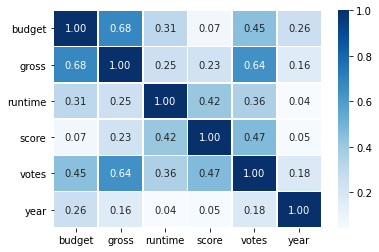

In [9]:
#correlation between each field of industry_df
sns.heatmap(data = industry_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

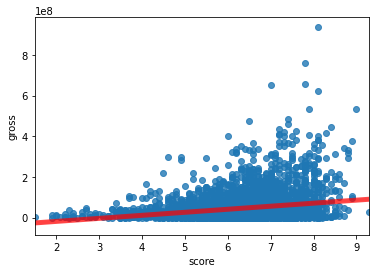

In [10]:
sns.regplot(x=industry_df["score"], y=industry_df["gross"], line_kws={"color":"r","alpha":0.7,"lw":5})

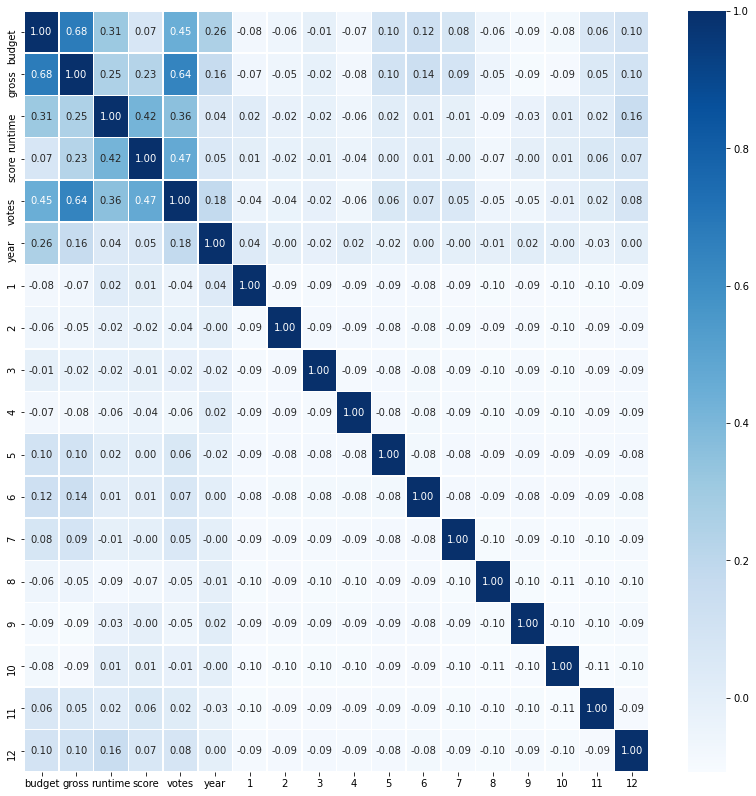

In [12]:
industry_months_df = pd.concat([industry_df, pd.get_dummies(industry_df.released.dt.month)], axis=1)
_, ax = plt.subplots(figsize=(14,14)) 
sns.heatmap(data = industry_months_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues', ax=ax)
#shows correlations between month of release and score etc.

              Series ID  Year Period  Value
Label                                      
1913-01-01  CUUR0000SA0  1913    M01    9.8
1913-02-01  CUUR0000SA0  1913    M02    9.8
1913-03-01  CUUR0000SA0  1913    M03    9.8
1913-04-01  CUUR0000SA0  1913    M04    9.8
1913-05-01  CUUR0000SA0  1913    M05    9.7
1913-06-01  CUUR0000SA0  1913    M06    9.8
1913-07-01  CUUR0000SA0  1913    M07    9.9
1913-08-01  CUUR0000SA0  1913    M08    9.9
1913-09-01  CUUR0000SA0  1913    M09   10.0
1913-10-01  CUUR0000SA0  1913    M10   10.0
       budget                                  company country  \
0   8000000.0            Columbia Pictures Corporation     USA   
1   6000000.0                       Paramount Pictures     USA   
2  15000000.0                       Paramount Pictures     USA   
3  18500000.0   Twentieth Century Fox Film Corporation     USA   
4   9000000.0                     Walt Disney Pictures     USA   
5   6000000.0                                  Hemdale      UK   
6  2500000

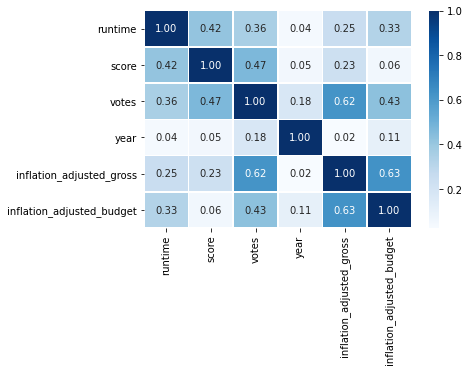

In [13]:
cpi_df = pd.read_csv(data_dir + '/cpi.csv')
cpi_df['Label'] = pd.to_datetime(cpi_df.Label, infer_datetime_format=True)
cpi_df.set_index('Label', inplace=True)
print(cpi_df.head(10))

cpi_aug_2020 = cpi_df.loc[pd.to_datetime('2020-08-01')]['Value']

def correct_for_inflation(timestamp, amount):
    #convert to 'todays's money'
    return cpi_aug_2020/cpi_df.loc[timestamp.replace(day=1)]['Value']*amount

def adjust_gross(movie):
    return correct_for_inflation(movie.released, movie.gross)

def adjust_budget(movie):
    return correct_for_inflation(movie.released, movie.budget)

industry_df['inflation_adjusted_gross'] = industry_df.apply(adjust_gross, axis=1)
industry_df['inflation_adjusted_budget'] = industry_df.apply(adjust_budget, axis=1)
print(industry_df.head(10))
    
sns.heatmap(data = industry_df.drop(['gross', 'budget'], axis=1).corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [19]:
nindustry_df = industry_df.drop(['gross', 'budget'],axis=1)
nindustry_df

,company,country,director,genre,name,rating,released,runtime,score,star,votes,writer,year,inflation_adjusted_gross,inflation_adjusted_budget
0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1.238873e+08,1.895482e+07
1,Paramount Pictures,USA,John Hughes,Comedy,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1.664813e+08,1.424208e+07
2,Paramount Pictures,USA,Tony Scott,Action,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,4.291406e+08,3.580138e+07
3,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,2.021432e+08,4.391309e+07
4,Walt Disney Pictures,USA,Randal Kleiser,Adventure,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,4.398612e+07,2.132418e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,Westerly Films,Ireland,Whit Stillman,Comedy,Love & Friendship,PG,2016-06-03,90,6.5,Kate Beckinsale,17862,Whit Stillman,2016,1.511247e+07,3.235252e+06
6809,Sycamore Pictures,USA,John Krasinski,Comedy,The Hollars,PG-13,2016-08-26,88,6.5,Sharlto Copley,7227,Jim Strouse,2016,1.097382e+06,4.100862e+06
6811,CBS Films,USA,Steve Carr,Animation,Middle School: The Worst Years of My Life,PG,2016-10-07,92,6.1,Griffin Gluck,4556,Chris Bowman,2016,2.148899e+07,9.139586e+06
6814,LD Entertainment,USA,Kevin Reynolds,Action,Risen,PG-13,2016-02-19,107,6.3,Joseph Fiennes,19084,Kevin Reynolds,2016,4.042162e+07,2.192374e+07


In [78]:
#Social-Economic Success Index
nindustry_df['SESI'] = nindustry_df.inflation_adjusted_gross * nindustry_df.score
nindustry_df
# print(nindustry_df['genre'].unique())
# print(nindustry_df['rating'].unique())

,company,country,director,genre,name,rating,released,runtime,score,star,votes,writer,year,inflation_adjusted_gross,inflation_adjusted_budget,SESI
0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1.238873e+08,1.895482e+07,1.003487e+09
1,Paramount Pictures,USA,John Hughes,Comedy,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1.664813e+08,1.424208e+07,1.298554e+09
2,Paramount Pictures,USA,Tony Scott,Action,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,4.291406e+08,3.580138e+07,2.961070e+09
3,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,2.021432e+08,4.391309e+07,1.698003e+09
4,Walt Disney Pictures,USA,Randal Kleiser,Adventure,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,4.398612e+07,2.132418e+07,3.035042e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,Westerly Films,Ireland,Whit Stillman,Comedy,Love & Friendship,PG,2016-06-03,90,6.5,Kate Beckinsale,17862,Whit Stillman,2016,1.511247e+07,3.235252e+06,9.823106e+07
6809,Sycamore Pictures,USA,John Krasinski,Comedy,The Hollars,PG-13,2016-08-26,88,6.5,Sharlto Copley,7227,Jim Strouse,2016,1.097382e+06,4.100862e+06,7.132982e+06
6811,CBS Films,USA,Steve Carr,Animation,Middle School: The Worst Years of My Life,PG,2016-10-07,92,6.1,Griffin Gluck,4556,Chris Bowman,2016,2.148899e+07,9.139586e+06,1.310828e+08
6814,LD Entertainment,USA,Kevin Reynolds,Action,Risen,PG-13,2016-02-19,107,6.3,Joseph Fiennes,19084,Kevin Reynolds,2016,4.042162e+07,2.192374e+07,2.546562e+08


In [82]:
#check this part
result_df = pd.merge(nindustry_df, movie_df, left_on='name', right_on='title', how='inner').drop(['title', 'genre','movieId'], axis=1)
result_df

,company,country,director,name,rating,released,runtime,score,star,votes,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Columbia Pictures Corporation,USA,Rob Reiner,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,...,0,0,0,0,0,0,0,0,0,0
1,Paramount Pictures,USA,John Hughes,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,...,0,0,0,0,0,0,0,0,0,0
2,Paramount Pictures,USA,Tony Scott,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,...,0,0,0,0,0,1,0,0,0,0
3,Twentieth Century Fox Film Corporation,USA,James Cameron,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,...,0,1,0,0,0,0,1,0,0,0
4,Walt Disney Pictures,USA,Randal Kleiser,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,Sycamore Pictures,USA,John Krasinski,The Hollars,PG-13,2016-08-26,88,6.5,Sharlto Copley,7227,...,0,0,0,0,0,0,0,0,0,0
4365,CBS Films,USA,Steve Carr,Middle School: The Worst Years of My Life,PG,2016-10-07,92,6.1,Griffin Gluck,4556,...,0,0,0,0,0,0,0,0,0,0
4366,LD Entertainment,USA,Kevin Reynolds,Risen,PG-13,2016-02-19,107,6.3,Joseph Fiennes,19084,...,0,0,0,0,0,0,0,0,0,0
4367,LD Entertainment,USA,Kevin Reynolds,Risen,PG-13,2016-02-19,107,6.3,Joseph Fiennes,19084,...,0,0,0,0,0,0,0,0,0,0


In [83]:
result_df = result_df.query("rating not in  ['UNRATED', 'NOT RATED', 'Not specified']")
result_df = pd.concat([result_df.drop('rating', axis=1), pd.get_dummies(result_df.rating)], axis=1)
result_df

,company,country,director,name,released,runtime,score,star,votes,writer,...,Romance,Sci-Fi,Thriller,War,Western,G,NC-17,PG,PG-13,R
0,Columbia Pictures Corporation,USA,Rob Reiner,Stand by Me,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,...,0,0,0,0,0,0,0,0,0,1
1,Paramount Pictures,USA,John Hughes,Ferris Bueller's Day Off,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,...,0,0,0,0,0,0,0,0,1,0
2,Paramount Pictures,USA,Tony Scott,Top Gun,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,...,1,0,0,0,0,0,0,1,0,0
3,Twentieth Century Fox Film Corporation,USA,James Cameron,Aliens,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,...,0,1,0,0,0,0,0,0,0,1
4,Walt Disney Pictures,USA,Randal Kleiser,Flight of the Navigator,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,Sycamore Pictures,USA,John Krasinski,The Hollars,2016-08-26,88,6.5,Sharlto Copley,7227,Jim Strouse,...,0,0,0,0,0,0,0,0,1,0
4365,CBS Films,USA,Steve Carr,Middle School: The Worst Years of My Life,2016-10-07,92,6.1,Griffin Gluck,4556,Chris Bowman,...,0,0,0,0,0,0,0,1,0,0
4366,LD Entertainment,USA,Kevin Reynolds,Risen,2016-02-19,107,6.3,Joseph Fiennes,19084,Kevin Reynolds,...,0,0,0,0,0,0,0,0,1,0
4367,LD Entertainment,USA,Kevin Reynolds,Risen,2016-02-19,107,6.3,Joseph Fiennes,19084,Kevin Reynolds,...,0,0,0,0,0,0,0,0,1,0


In [84]:
list(result_df.columns.values) 

['company',
 'country',
 'director',
 'name',
 'released',
 'runtime',
 'score',
 'star',
 'votes',
 'writer',
 'year',
 'inflation_adjusted_gross',
 'inflation_adjusted_budget',
 'SESI',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western',
 'G',
 'NC-17',
 'PG',
 'PG-13',
 'R']

In [95]:
from sklearn import linear_model
numerical_columns = ["inflation_adjusted_budget", "runtime", 'year']
input_variable_names = numerical_columns + movie_genres
output_variable_name = "SESI"
print(input_variable_names)

input_df = result_df[input_variable_names]
input_df[numerical_columns] = input_df[numerical_columns].apply(lambda x: (x - x.mean()) / (x.std()))
#this gives me a warning, maybe someone knows how to fix it?
output_df = result_df[output_variable_name]
output_df = (output_df - output_df.mean())/output_df.std()
regr = linear_model.ElasticNet(alpha=0.1)
regr.fit(input_df, output_df)

print(np.transpose([input_variable_names, regr.coef_]))
print(regr.score(input_df, output_df))

#print(result_df.corr())

['inflation_adjusted_budget', 'runtime', 'year', 'Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir']
[['inflation_adjusted_budget' '0.5262142068860681']
 ['runtime' '0.041701004041833065']
 ['year' '-0.0']
 ['Adventure' '0.0']
 ['Animation' '0.0']
 ['Children' '0.0']
 ['Comedy' '0.0']
 ['Fantasy' '0.0']
 ['Romance' '0.0']
 ['Drama' '-0.0']
 ['Action' '0.0']
 ['Crime' '-0.0']
 ['Thriller' '-0.0']
 ['Horror' '-0.0']
 ['Mystery' '-0.0']
 ['Sci-Fi' '0.0']
 ['IMAX' '0.0']
 ['Documentary' '-0.0']
 ['War' '-0.0']
 ['Musical' '0.0']
 ['Western' '-0.0']
 ['Film-Noir' '-0.0']]
0.37743302486345276


c:\users\elbai\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
list(result_df.columns.values) 

In [ ]:
result_df = result_df.query("rating not in  ['UNRATED', 'NOT RATED', 'Not specified']")
result_df = pd.concat([result_df.drop('rating', axis=1), pd.get_dummies(result_df.rating)], axis=1)
result_df

In [ ]:
list(result_df.columns.values) 

In [95]:
list(result_df.columns.values) 

,company,country,director,name,rating,released,runtime,score,star,votes,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Columbia Pictures Corporation,USA,Rob Reiner,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,...,0,0,0,0,0,0,0,0,0,0
1,Paramount Pictures,USA,John Hughes,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,...,0,0,0,0,0,0,0,0,0,0
2,Paramount Pictures,USA,Tony Scott,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,...,0,0,0,0,0,1,0,0,0,0
3,Twentieth Century Fox Film Corporation,USA,James Cameron,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,...,0,1,0,0,0,0,1,0,0,0
4,Walt Disney Pictures,USA,Randal Kleiser,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,Sycamore Pictures,USA,John Krasinski,The Hollars,PG-13,2016-08-26,88,6.5,Sharlto Copley,7227,...,0,0,0,0,0,0,0,0,0,0
4365,CBS Films,USA,Steve Carr,Middle School: The Worst Years of My Life,PG,2016-10-07,92,6.1,Griffin Gluck,4556,...,0,0,0,0,0,0,0,0,0,0
4366,LD Entertainment,USA,Kevin Reynolds,Risen,PG-13,2016-02-19,107,6.3,Joseph Fiennes,19084,...,0,0,0,0,0,0,0,0,0,0
4367,LD Entertainment,USA,Kevin Reynolds,Risen,PG-13,2016-02-19,107,6.3,Joseph Fiennes,19084,...,0,0,0,0,0,0,0,0,0,0


In [96]:
result_df = result_df.query("rating not in  ['UNRATED', 'NOT RATED', 'Not specified']")
result_df = pd.concat([result_df.drop('rating', axis=1), pd.get_dummies(result_df.rating)], axis=1)
result_df

,company,country,director,name,released,runtime,score,star,votes,writer,...,Romance,Sci-Fi,Thriller,War,Western,G,NC-17,PG,PG-13,R
0,Columbia Pictures Corporation,USA,Rob Reiner,Stand by Me,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,...,0,0,0,0,0,0,0,0,0,1
1,Paramount Pictures,USA,John Hughes,Ferris Bueller's Day Off,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,...,0,0,0,0,0,0,0,0,1,0
2,Paramount Pictures,USA,Tony Scott,Top Gun,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,...,1,0,0,0,0,0,0,1,0,0
3,Twentieth Century Fox Film Corporation,USA,James Cameron,Aliens,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,...,0,1,0,0,0,0,0,0,0,1
4,Walt Disney Pictures,USA,Randal Kleiser,Flight of the Navigator,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,Sycamore Pictures,USA,John Krasinski,The Hollars,2016-08-26,88,6.5,Sharlto Copley,7227,Jim Strouse,...,0,0,0,0,0,0,0,0,1,0
4365,CBS Films,USA,Steve Carr,Middle School: The Worst Years of My Life,2016-10-07,92,6.1,Griffin Gluck,4556,Chris Bowman,...,0,0,0,0,0,0,0,1,0,0
4366,LD Entertainment,USA,Kevin Reynolds,Risen,2016-02-19,107,6.3,Joseph Fiennes,19084,Kevin Reynolds,...,0,0,0,0,0,0,0,0,1,0
4367,LD Entertainment,USA,Kevin Reynolds,Risen,2016-02-19,107,6.3,Joseph Fiennes,19084,Kevin Reynolds,...,0,0,0,0,0,0,0,0,1,0


In [97]:
list(result_df.columns.values) 

['company',
 'country',
 'director',
 'name',
 'released',
 'runtime',
 'score',
 'star',
 'votes',
 'writer',
 'year',
 'inflation_adjusted_gross',
 'inflation_adjusted_budget',
 'SESI',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western',
 'G',
 'NC-17',
 'PG',
 'PG-13',
 'R']